## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## [熱力圖]
#### 說明:利用熱力圖可以看資料表裡多個特徵兩兩的相似度

##### seaborn.heatmap(data, vmin=None, vmax=None,cmap=None, center=None, robust=False, annot=None, fmt=’.2g’, annot_kws=None,linewidths=0, linecolor=’white’, cbar=True, cbar_kws=None, cbar_ax=None,square=False, xticklabels=’auto’, yticklabels=’auto’, mask=None, ax=None,**kwargs)

- `data`:矩陣資料集。
- `vmax`,`vmin`:分別是熱力圖的顏色取值最大和最小範圍。
- `cmap`:從數字到色彩空間的對映。
- `center`:資料表取值有差異時，設定熱力圖的色彩中心對齊值。
- `robust`:預設取值`False`；如果是`False`，且沒設定`vmin`和`vmax`的值，熱力圖的顏色對映範圍根據具有魯棒性的分位數設定，而不是用極值設定。
- `annot`(annotate的縮寫):預設取值`False`；如果是`True`，在熱力圖每個方格寫入資料；如果是矩陣，在熱力圖每個方格寫入該矩陣對應位置資料。
- `fmt`:字串格式程式碼，矩陣上標識數字的資料格式，比如保留小數點後幾位數字。
- `annot_kws`:預設取值`False`；如果是`True`，設定熱力圖矩陣上數字的大小顏色字型，`matplotlib`包`text`類下的字型設定。
- `linewidths`:定義熱力圖裡"表示兩兩特徵關係的小塊矩陣"之間的間隔大小。
- `linecolor`:切分熱力圖上每個矩陣小塊的線的顏色，預設值是"white"。
- `cbar`:是否在熱力圖側邊繪製顏色刻度條，預設值是`True`。
- `cbar_kws`:熱力圖側邊繪製顏色刻度條時，相關字型設定，預設值是`None`。
- `cbar_ax`:熱力圖側邊繪製顏色刻度條時，刻度條位置設定，預設值是`None`。
- `xticklabels`, `yticklabels`:`xticklabels`控制每列標籤名的輸出；`yticklabels`控制每行標籤名的輸出。
- `mask`:控制某個矩陣塊是否顯示出來。
- `ax`:設定作圖的座標軸。
- `**kwargs`:All other keyword arguments are passed to ax.pcolormesh。

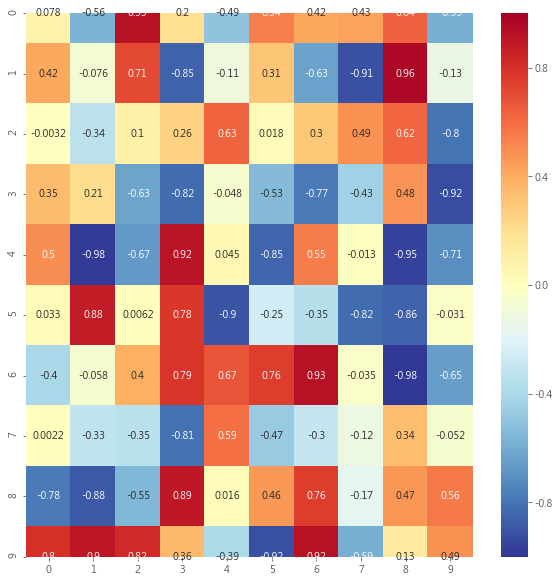

In [3]:
"""
Your Code Here
"""
# np.random.random():隨機得到數字
matrix = np.random.random(size=(10,10)) *2 -1 # 建立10 * 10的矩陣，並且隨機給它數值，最後將它*2減去1
plt.figure(figsize=(10,10))
"""
Your Code Here
"""
# 繪製的熱力圖(Heatmap)
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.show()

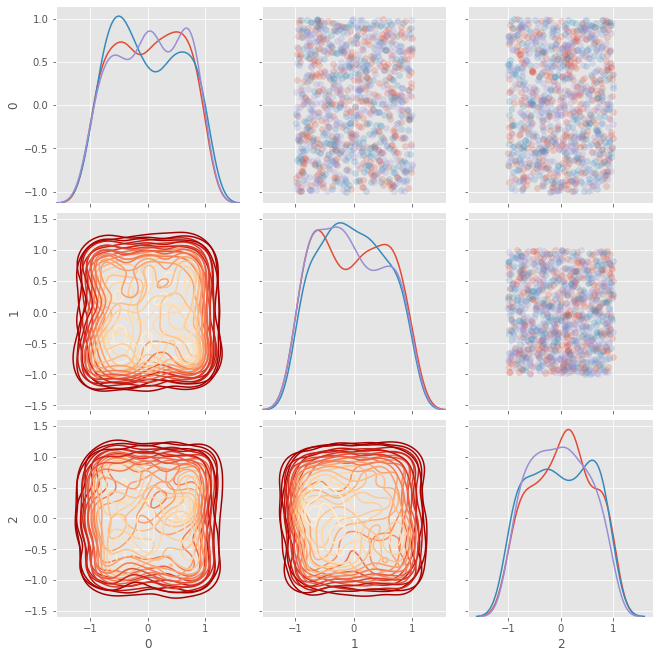

In [2]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
# 建立nrow * ncol的矩陣，並且隨機給它數值，最後將它*2減去1
matrix = 2 * (np.random.rand(nrow, ncol) ) -1

# 隨機給予 0, 1, 2 三種標籤
#  np.random.choice(a,size=,replace=False, p=None):意思分別是從a中以概率P，隨機選擇n個, p沒有指定的時候相當於是一致的分佈
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""

# 上半部為 scatter
grid.map_upper(plt.scatter , alpha = 0.2)
# 對角線畫 histogram
grid.map_diag(sns.kdeplot )
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

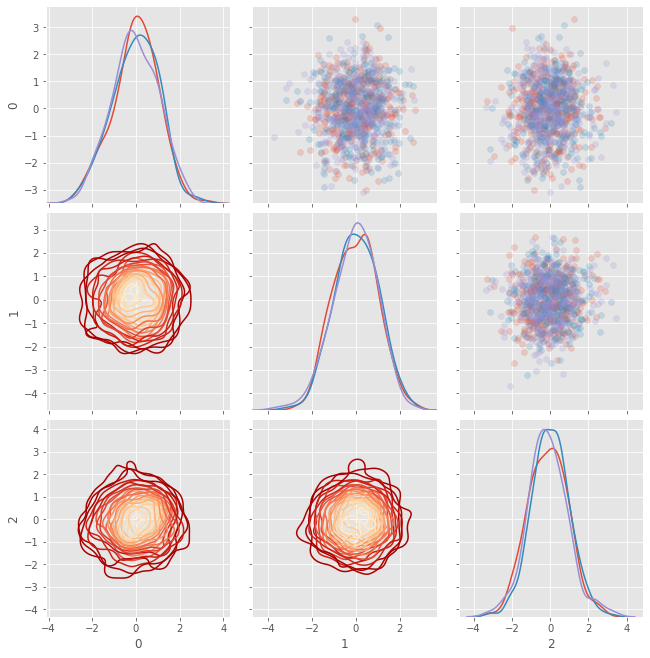

In [3]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
# np.random.random():隨機得到數字
matrix = np.random.randn(nrow,ncol)

# 隨機給予 0, 1, 2 三種標籤
# 建立nrow * ncol的矩陣，並且隨機給它數值，最後將它*2減去1
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
# sns.PairGrid():繪製數據網格
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
# 上半部為 scatter
grid.map_upper(plt.scatter , alpha = 0.2)
# 對角線畫 histogram
grid.map_diag(sns.kdeplot) # sns.kdeplot:繪製核密度估計圖
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r) # sns.kdeplot:繪製核密度估計圖

plt.show()